In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
import glob
#import everything

In [2]:
def VariablesAndMath(Directory, FileType, TotalTime):
    os. chdir(Directory) #sets working directory
    global header_length
    header_length=19
    global footer_length
    footer_length=94 #sets how many rows to skip at the bottom. For Trough data can probably just use 0 or 1 and it should work.
    global XLabel
    XLabel="Wavelength (nm)" #sets x axis label for graph later on
    global YLabel
    YLabel="Absorbance" #sets y axis label for graph later on
    #This is everything that needs to be changed from file to file
    
    files = sorted(glob.glob("*"+FileType))
    files.sort(key=os.path.getmtime)
    global XAxis
    XAxis=[]
    global YAxis
    YAxis=[] #creates to empty sets where the x and y values of all documents will be appended for later graphing
    global legendNames
    legendNames=[]
    ##################

    for entry in range(len(files)):
        name = files[entry]
        if FileType == "csv":
            CurrFile = pd.read_csv(files[entry],skiprows = header_length, skipfooter=footer_length, engine='python')#sets amount of lines to skip at beginning and end of a document
            CurrFile.columns=["Wavelength","Absorbance"]
            XAxis.append(CurrFile["Wavelength"])
            YAxis.append(CurrFile["Absorbance"])
    
            FullSplit = name.split("_") #gets all parts of the file name
            legendNames.append(FullSplit[2])# gets the hour/time labelling (0 is date, 1 is name of compound/molarity, 2 is time)

            if legendNames[entry] == 'pre': #this script replaces "pre" with 0hr
                legendNames.pop(0) #removes first (may be pre if early otherwise will be 0hr)
                legendNames.append("0hr") #appends the value of "0 hr", replacing "pre"

            elif legendNames[entry] == 'post': #this script replaces post with a user inputted time of the total photolysis
                legendNames.pop() #removes last entry (will be post in this case)
                legendNames.append(TotalTime) #appends the value of total time, replacing post

            else:
                continue #if everything is normal, continues
        #reads all files in given folder if they are csv and appends wavelength and Absorbance to XAxis and YAxis dataframes
        #######################################

        elif FileType == "xlsx":   #if file is not csv but is xlsx it goes through this function instead
            #CompFile = files[entry]
            #print(CompFile)
            CurrFile = pd.read_excel(files[entry],skiprows = header_length, skipfooter=footer_length, engine='python')#sets amount of lines to skip at beginning and end of a document
            CurrFile.columns=["Wavelength","Absorbance"]
            XAxis.append(CurrFile["Wavelength"])
            YAxis.append(CurrFile["Absorbance"])

            FullSplit = name.split("_") #gets all parts of the file name

            legendNames.append(FullSplit[3])# gets the hour/time labelling (0 is date, 1 is name of compound/molarity, 2 is time)
            if legendNames[entry] == 'pre': #this script replaces "pre" with 0hr
                legendNames.pop(0) #removes first (may be pre if early otherwise will be 0hr)
                legendNames.append("0hr") #appends the value of "0 hr", replacing "pre"

            elif legendNames[entry] == 'post': #this script replaces post with a user inputted time of the total photolysis
                legendNames.pop() #removes last entry (will be post in this case)
                legendNames.append(TotalTime) #appends the value of total time, replacing post

            else:
                continue #if everything is normal, continues
        #reads all files in given folder if they are xlsx and appends wavelength and Absorbance to XAxis and YAxis dataframes
        ######################################
        
    return(legendNames)
   
    

In [3]:
def FigStyle(OutputName): #axis will be shared
    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    ###########################
    
    plt.rcParams['axes.linewidth'] = 1
    mpl.rcParams['axes.spines.right'] = True
    mpl.rcParams['axes.spines.top'] = True
    plt.axis(xmin=250,xmax=600)
    ###########################
    
    mpl.rcParams['xtick.top']=False
    mpl.rcParams['ytick.right']=False
    plt.tick_params(direction='inout')
    plt.tick_params('both', length=5, width=2, which='major')
    ###########################
   
    plt.xlabel(XLabel, size=15) #x axis label
    plt.ylabel(YLabel, size=17) #y axis label
    ###########################
    
    plt.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.02, 1)) #creates legend and specifies location + formatting
    ###########################
    
    plt.savefig(OutputName+".png", dpi=300, transparent=False) 
    plt.show() #shows the final plot
    ###########################

    #sets basic formatting for our plot
    return()
    ###########################

In [4]:
def main():
    VariablesAndMath("/Users/timmo/Documents/RAPFLAB/TM/210525/pyruvic/1","csv","16hr")
    ###############
    
    fig, ax = plt.subplots(sharex =True , sharey= True, figsize=(6,4))
    for i in range(len(XAxis)):
        x= XAxis[i]
        y= YAxis[i] #plots the x and y values of each dataframe individually on a shared axis
        ax.plot(x, y) #plots the graph in a loop on the same axes 
    ###############
    
    FigStyle("Hello")
    


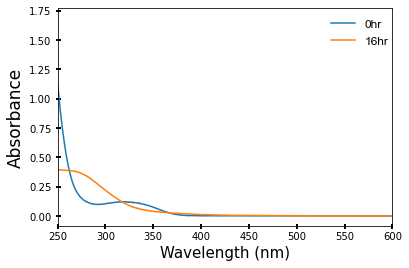

In [5]:
if __name__== "__main__":
    main()